,Minutes,Time (sec),Conductivity (mS/cm),Difference,Temp degC,Unnamed: 5
0,0:00,0.0,7.360,NaN,47.0,0.05 NaOH
1,1:40,100.0,4.045,-3.315,NaN,0.05 ethyl acetate
2,3:20,200.0,3.430,-0.615,NaN,NaN
3,5:00,300.0,3.182,-0.248,NaN,NaN
4,6:40,400.0,3.042,-0.140,NaN,NaN
5,8:20,500.0,2.965,-0.077,NaN,NaN
6,10:00,600.0,2.908,-0.057,NaN,NaN
7,11:40,700.0,2.869,-0.039,NaN,NaN
8,13:20,800.0,2.837,-0.032,NaN,NaN
9,15:00,900.0,2.816,-0.021,NaN,NaN


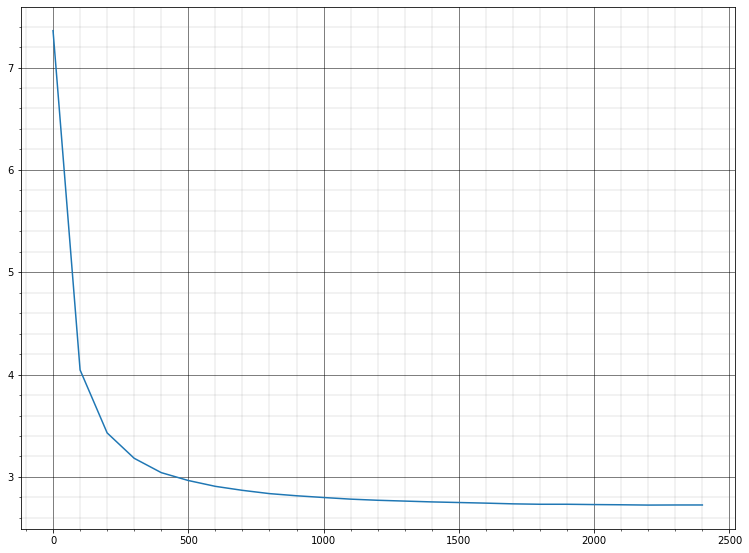

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Data Conductivity/47CSteady.csv")
data = data[0:25]

plt.figure(1,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],data["Conductivity (mS/cm)"])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')
data

In [2]:
import numpy as np
from scipy.optimize import fsolve
import os

newData = pd.DataFrame()
newData["Time (sec)"] = data["Time (sec)"]

C_Ea0 = 0.05 #mol/L
C_Eainf = 0 #mol/L
L0 = data["Conductivity (mS/cm)"][0]
Linf = np.amin(data["Conductivity (mS/cm)"])
newData["Conc Ea (mol/L)"] = np.zeros(len(data["Time (sec)"]))

def FindC_Ea(C_Ea,Lt):
    return ((L0 - Lt)/(Lt - Linf)) - ((C_Ea0 - C_Ea)/(C_Ea - C_Eainf))

reachedMin = False
for i in range(0,len(data["Time (sec)"])):
    if i > 0:
        guessValue = newData["Conc Ea (mol/L)"][i-1]
    else:
        guessValue = C_Ea0
    if data["Conductivity (mS/cm)"][i] != Linf and reachedMin == False:
        newData["Conc Ea (mol/L)"][i] = fsolve(FindC_Ea,guessValue,args=data["Conductivity (mS/cm)"][i])
    else:
        newData["Conc Ea (mol/L)"][i] = C_Eainf
        reachedMin = True
    
newData["Temperature (degC)"] = np.ones(len(data["Time (sec)"]))*data["Temp degC"][0]

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
ensure_dir("Data Concentration/47CSteady.csv")
newData.to_csv("Data Concentration/47CSteady.csv", index=False, encoding='utf8')

newData

,Time (sec),Conc Ea (mol/L),Temperature (degC)
0,0.0,0.050000,47.0
1,100.0,0.014239,47.0
2,200.0,0.007605,47.0
3,300.0,0.004930,47.0
4,400.0,0.003420,47.0
5,500.0,0.002589,47.0
6,600.0,0.001974,47.0
7,700.0,0.001553,47.0
8,800.0,0.001208,47.0
9,900.0,0.000982,47.0
